# Especialidad en Estadistica Aplicada
## Data Mining
### Nombre: Mateo Orozco Baldovino
### Fecha: 30 de Enero de 2026
La informacion de este cuaderno puede ser encontrado en el repositorio de GitHub:
https://github.com/TheMaorba/DataMining/tree/main/Tarea5

# Caracteristicas de la base de datos

### *Variables del dataset bancario:*
- age: edad del cliente.
- job: tipo de ocupación laboral.
- marital: estado civil.
- education: nivel educativo alcanzado.
- default: tiene créditos en mora.
- balance: saldo promedio anual en la cuenta.
- housing: tiene crédito hipotecario.
- loan: tiene crédito personal.
- contact: medio de contacto utilizado.
- day: día del mes del último contacto.
- month: mes del último contacto.
- duration: duración de la última llamada (segundos).
- campaign: número de contactos en la campaña actual.
- pdays: días desde el último contacto previo.
- previous: contactos realizados antes de la campaña actual.
- poutcome: resultado de la campaña anterior.
- y: se suscribió o no al depósito a término.

# Informacion Tarea 5 

Para esta tarea deberá seguir trabajando con el conjunto de datos que ha venido usando desde las tareas anteriores y:

- Aplicar PCA para reducir las características utilizadas en análisis;

- Realizar un análisis (directamente en el notebook) de los resultados obtenidos y comparar con los resultados que obtenían al aplicar solamente correlación de características.

- Debe entregar el notebook (como html) y el conjunto de datos con el cuál está trabajando. Recordar dejar muy en claro sus propios comentarios y análisis de los resultados, sobre todo porque esta es la única entrega que no requiere de diapositivas.

# Importando librerias y base de datos

In [2]:
%reset -f

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:

 #Importando la base de datos
df = pd.read_csv(r"D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\bank.csv", sep=";")

In [5]:
# Imprimiendo tipos de datos y separando las variables numericas
df.info()
columnas_numericas = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
# Tambien se puede usar columnas_numericas = df.select_dtypes(include=['float64', 'int64'])
# Eliminar columnas no numericas
df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,no
1,44,29,5,151,1,-1,0,no
2,33,2,5,76,1,-1,0,no
3,47,1506,5,92,1,-1,0,no
4,33,1,5,198,1,-1,0,no


# PCA (Analisis de componentes principales)

In [7]:
# Estandarizar los datos
datos_escalados = StandardScaler().fit_transform(columnas_numericas)
# Crear un DataFrame con los datos estandarizados
df_estandar = pd.DataFrame(datos_escalados, columns=columnas_numericas.columns)

In [8]:
df_estandar.head(5)

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


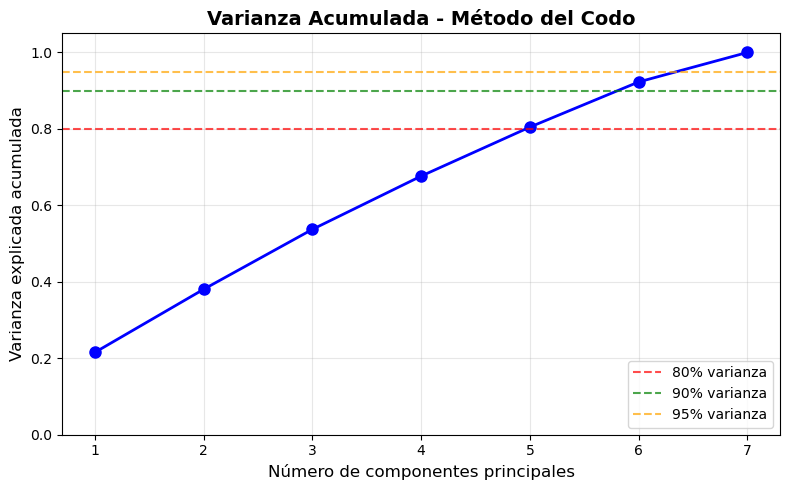

Varianza explicada por componente:
PC1: 0.2156 (21.56%)
PC2: 0.1650 (16.50%)
PC3: 0.1567 (15.67%)
PC4: 0.1393 (13.93%)
PC5: 0.1282 (12.82%)
PC6: 0.1180 (11.80%)
PC7: 0.0772 (7.72%)


In [9]:
# Método del codo para PCA
pca = PCA().fit(datos_escalados)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), 
         varianza_acumulada, 
         'bo-', 
         linewidth=2, 
         markersize=8)

# Líneas de referencia
plt.axhline(y=0.80, color='red', linestyle='--', label='80% varianza', alpha=0.7)
plt.axhline(y=0.90, color='green', linestyle='--', label='90% varianza', alpha=0.7)
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% varianza', alpha=0.7)

plt.xlabel('Número de componentes principales', fontsize=12)
plt.ylabel('Varianza explicada acumulada', fontsize=12)
plt.title('Varianza Acumulada - Método del Codo', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(varianza_acumulada) + 1))
plt.ylim([0, 1.05])
plt.tight_layout()
plt.show()

# Imprimir varianza explicada por componente
print("Varianza explicada por componente:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

Teniendo en cuenta los resultados obtenidos en el metodo del codo nos indica que el numero optimo de componentes es de 7 teniendo en cuenta que con ese numero de componentes se logra explicar el 95% de la varianza de los datos originales.

In [10]:
# Aplicar PCA y crea un Array con los componentes principales seleccionados
pca2 = PCA(n_components=7, random_state=42)
componentes_principales = pca2.fit_transform(datos_escalados)
# Crear un DataFrame con los resultados de PCA
df_pca2 = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7'])
df_pca2.head(5)

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,0.033707,-1.402827,1.025284,-1.075341,-0.778167,0.292582,-0.152987
1,0.017589,-0.954478,-0.356871,-1.208935,-0.259824,0.274863,-0.218753
2,0.022938,-0.699632,-1.071917,-1.197462,0.499407,0.332147,-0.262384
3,0.011669,-0.954774,0.181356,-1.391388,-0.050603,0.248351,-0.206882
4,0.051021,-0.912816,-1.085188,-0.811320,0.363598,0.433987,-0.252515


In [11]:
print(f"Varianza explicada por cada componente: {pca2.explained_variance_}")
print(f"Proporción de varianza explicada por cada componente: {pca2.explained_variance_ratio_}")

Varianza explicada por cada componente: [1.50932686 1.15503984 1.09704035 0.97500185 0.89743459 0.82617914
 0.54013221]
Proporción de varianza explicada por cada componente: [0.21561335 0.16500204 0.15671658 0.1392829  0.12820211 0.11802298
 0.07716004]


Teniendo en cuenta los resultados obtenidos nos indica que la varianza es explicada mayoritariamente por el componente 1, que compone un 21.5% de la varianza total, seguido por el componente 2 con un 16.5% y el componente 3 con un 15.6% de la varianza total. Los demas componentes explican una menor cantidad de varianza, siendo el coomponente 7 el que menos varianza explica con un 7.7% de la varianza total.

In [12]:
# Correlación de los componentes del PCA
cargas = pd.DataFrame(pca2.components_.T, 
                      columns=[f'Componente {i+1}' for i in range(pca2.n_components_)], 
                      index=columnas_numericas.columns)
print("Correlación de los componentes del PCA:")
print(cargas)

Correlación de los componentes del PCA:
          Componente 1  Componente 2  ...  Componente 6  Componente 7
age          -0.022080     -0.118235  ...     -0.116740      0.036145
balance       0.028662     -0.144324  ...      0.114900      0.013263
day          -0.271250      0.511672  ...     -0.649043      0.040669
duration      0.059299     -0.450100  ...      0.215049      0.020841
campaign     -0.254936      0.612232  ...      0.710324      0.077132
pdays         0.667509      0.207383  ...     -0.031275      0.712322
previous      0.641122      0.288023  ...      0.011367     -0.695038

[7 rows x 7 columns]


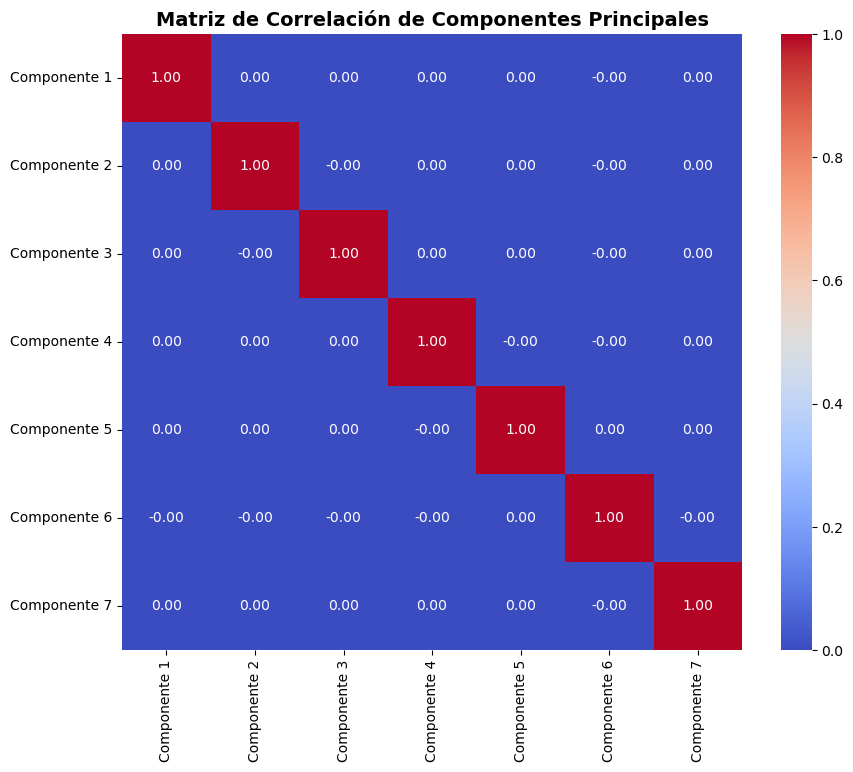

In [13]:
# Matriz de correlación de los componentes principales
plt.figure(figsize=(10, 8))
sns.heatmap(df_pca2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Componentes Principales', fontsize=14, fontweight='bold')
plt.show()

Este gráfico muestra la matriz de correlación entre los componentes principales (PCA) y confirma que el análisis PCA se realizó correctamente, ya que todos los componentes son perfectamente independientes entre sí (ortogonales). La diagonal principal en rojo intenso muestra que cada componente tiene correlación perfecta consigo mismo (1.00), mientras que todos los demás valores son 0.00 (azul oscuro), lo que significa que no hay correlación entre diferentes componentes - esto es exactamente lo que se espera de PCA, cuyo objetivo es crear variables nuevas que sean completamente independientes y capturen la máxima varianza posible sin redundancia. Esta ortogonalidad es la propiedad matemática fundamental de PCA que permite reducir dimensionalidad sin perder información de manera eficiente.

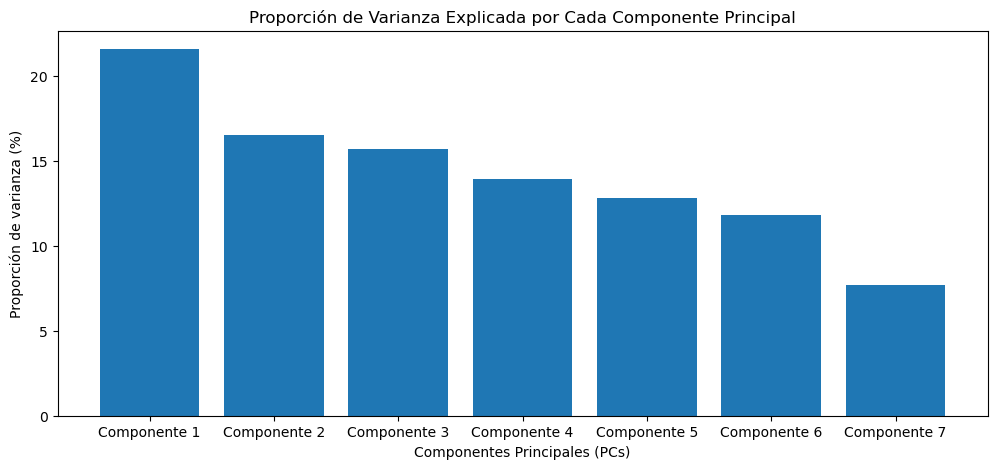

In [14]:
# Grafico de barra de proporcion de varianza explicada por cada componente
plt.figure(figsize=(12,5))
plt.bar(df_pca2.columns, pca2.explained_variance_ratio_ * 100)
plt.ylabel("Proporción de varianza (%)")
plt.xlabel("Componentes Principales (PCs)")
plt.title("Proporción de Varianza Explicada por Cada Componente Principal")
plt.show()


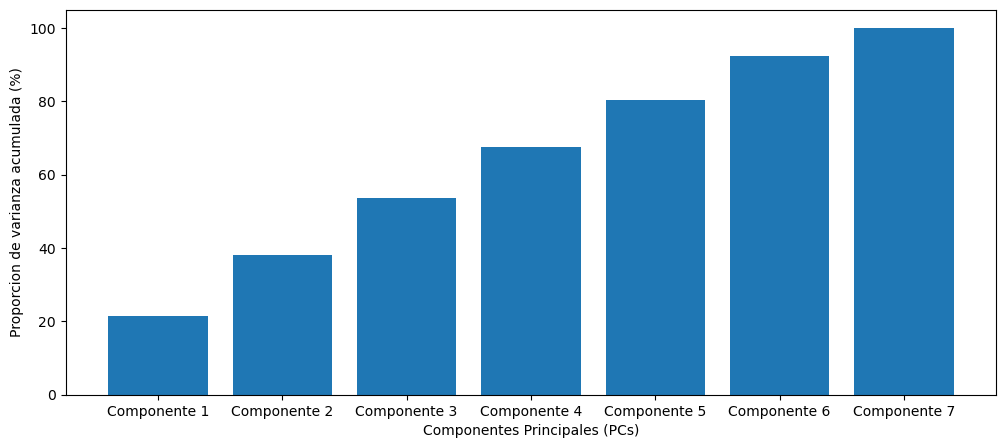

In [15]:
plt.figure(figsize=(12,5))
plt.bar(df_pca2.columns, np.cumsum(pca2.explained_variance_ratio_ * 100))
plt.ylabel("Proporcion de varianza acumulada (%)")
plt.xlabel("Componentes Principales (PCs)")
plt.show()

[1.50932686 1.15503984 1.09704035 0.97500185 0.89743459 0.82617914
 0.54013221]


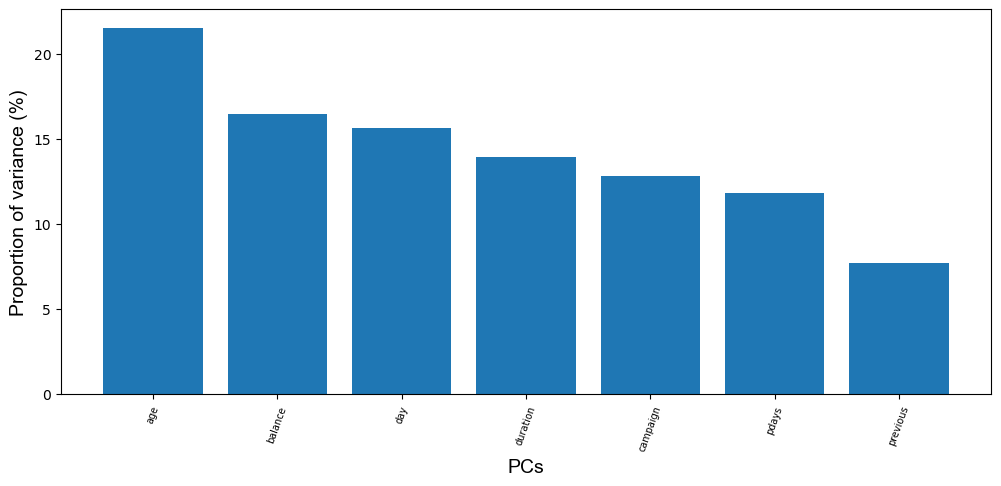

In [16]:
# obtener los valores propios (varianza explicada por cada PC)  
print(pca2.explained_variance_)

# obtener gráfico de sedimentación (para prueba de sedimentación o prueba del codo)
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[df_estandar.columns, pca2.explained_variance_ratio_], show=True, dim=(12,5), axlabelfontsize=14)
plt.show()
# El gráfico de sedimentación se guardará en el mismo directorio con el nombre screeplot.png

d:\Programas\anaconda3\envs\pyconda\Lib\site-packages\bioinfokit\visuz.py:1805: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x[i], y[i])
d:\Programas\anaconda3\envs\pyconda\Lib\site-packages\bioinfokit\visuz.py:1807: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], y[i], varnames, fontsize=10)


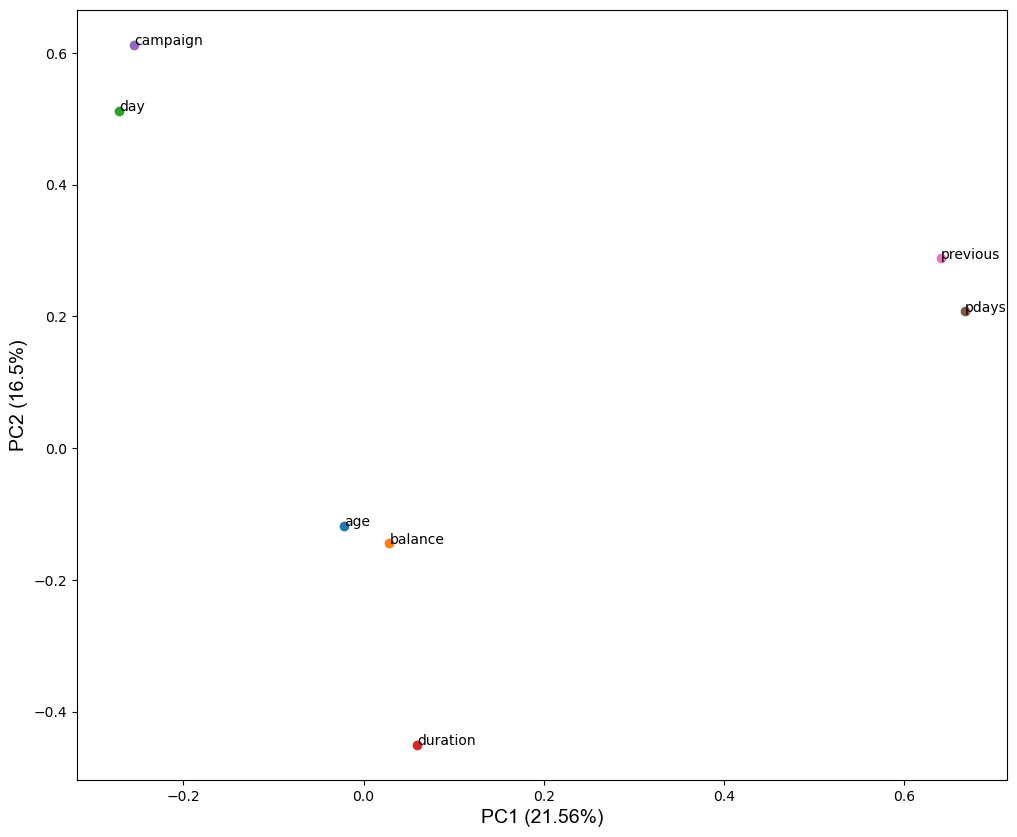

In [17]:
# obtener gráficos de cargas de PCA (2D y 3D)
# 2D
cluster.pcaplot(
    x=cargas['Componente 1'],
    y=cargas['Componente 2'],
    labels=columnas_numericas.columns.values,
    show=True, dim=(12,10), axlabelfontsize=14,
    var1=round(pca2.explained_variance_ratio_[0]*100, 2),
    var2=round(pca2.explained_variance_ratio_[1]*100, 2)
)

Este biplot 2D del PCA muestra las cargas de las variables en PC1 (21.56%) y PC2 (16.5%). Se observan tres grupos distintos: previous y pdays están fuertemente correlacionados en la región derecha; age y balance aparecen juntos en el centro-inferior izquierdo; mientras que campaign, day y duration se distribuyen en diferentes cuadrantes. Duration tiene carga negativa en PC2, sugiriendo una relación inversa con campaign y day, revelando patrones de correlación entre las variables del dataset.

d:\Programas\anaconda3\envs\pyconda\Lib\site-packages\bioinfokit\visuz.py:1816: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(x[i], y[i], z[i])
d:\Programas\anaconda3\envs\pyconda\Lib\site-packages\bioinfokit\visuz.py:1818: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i], y[i], z[i], varnames, fontsize=10)


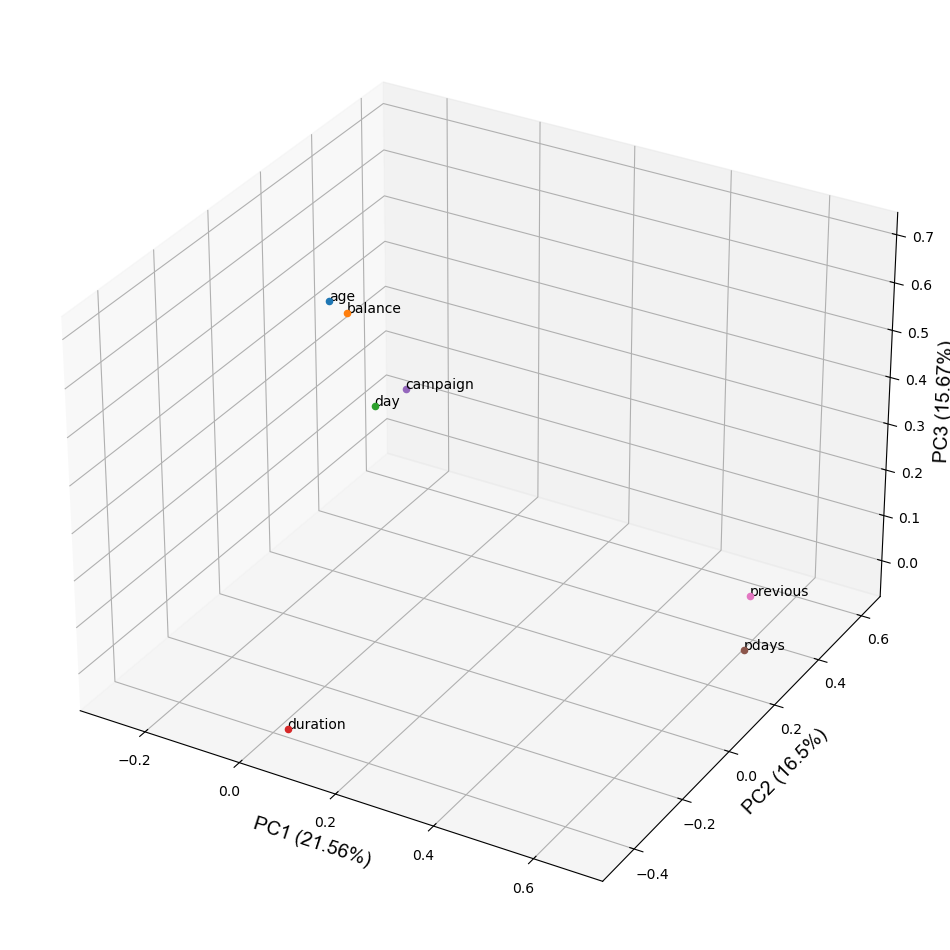

In [18]:

# 3D
# Gráfico de cargas en 3D de los componentes principales
cluster.pcaplot(
    x=cargas['Componente 1'],
    y=cargas['Componente 2'],
    z=cargas['Componente 3'],
    labels=columnas_numericas.columns.values,
    show=True, dim=(12,16), axlabelfontsize=14,
    var1=round(pca2.explained_variance_ratio_[0]*100, 2),
    var2=round(pca2.explained_variance_ratio_[1]*100, 2),
    var3=round(pca2.explained_variance_ratio_[2]*100, 2)
)

Este gráfico 3D muestra los vectores de carga (loadings) del PCA, representando cómo cada variable original contribuye a las tres componentes principales. Se observa que age y balance se proyectan fuertemente en PC1, duration en la región negativa de PC1, mientras que previous y pdays dominan PC2. Campaign y day tienen proyecciones moderadas distribuidas entre PC1 y PC3, revelando las estructuras de correlación subyacentes entre las variables del dataset.

Biplot del PCA

In [24]:

cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=4, vmax=5)

Número de clusters: 2
Tipo de cargas_array: <class 'numpy.ndarray'>
Shape de cargas_array: (7, 7)


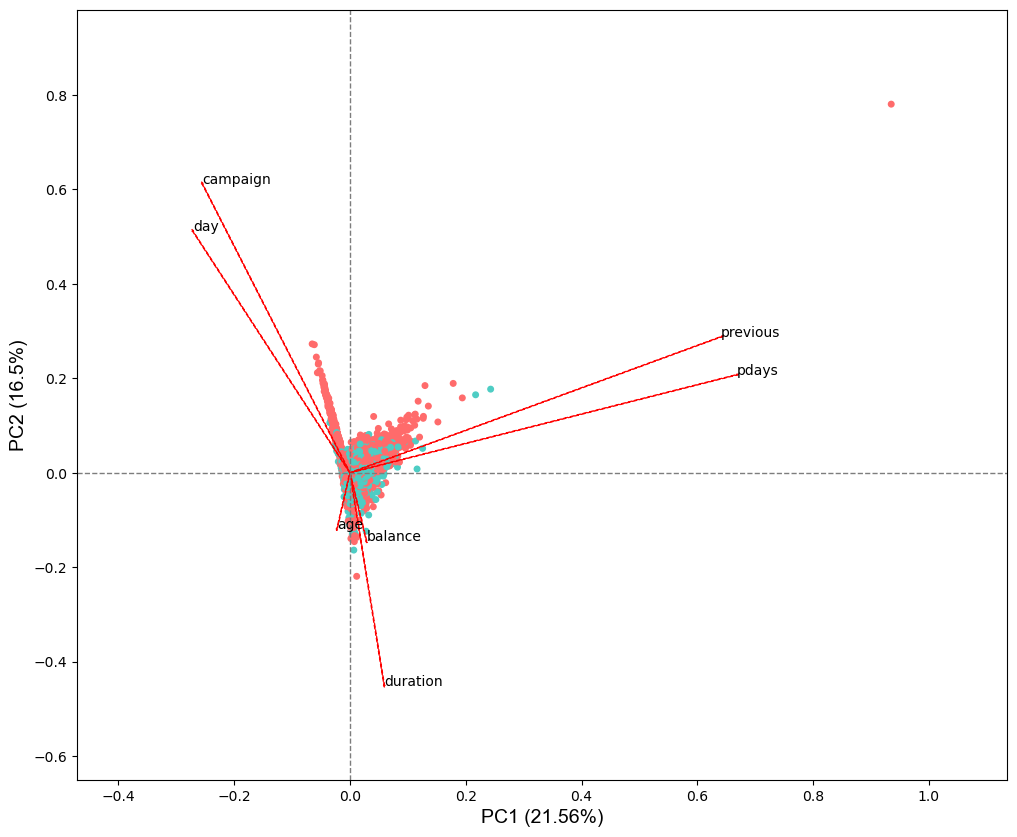

In [26]:
# Get PC scores
pca_scores = componentes_principales

# Verificar cuántos clusters tienes
# Convertir etiquetas 'yes'/'no' a valores numéricos
# Definir el mapeo de etiquetas (corrección: color_map no estaba definido)
color_map = {'no': 0, 'yes': 1}
colors = df['y'].map(color_map).values
n_clusters = len(np.unique(colors))
print(f"Número de clusters: {n_clusters}")

# Definir paleta de colores
color_palette = {
    0: '#FF6B6B',  # Rojo coral
    1: '#4ECDC4',  # Turquesa
    2: '#45B7D1',  # Azul cielo
    3: '#FFA07A',  # Salmón
    4: '#98D8C8',  # Verde menta
    5: '#F7DC6F',  # Amarillo
    6: '#BB8FCE'   # Púrpura
}

# Convertir etiquetas a colores
colores_validos = [color_palette[int(c)] for c in colors]

# ⭐ CORRECCIÓN PRINCIPAL: Convertir DataFrame a NumPy array
if isinstance(cargas, pd.DataFrame):
    cargas_array = cargas.values.T  # Convertir a array y transponer
else:
    cargas_array = cargas.T  # Ya es array, solo transponer

print(f"Tipo de cargas_array: {type(cargas_array)}")
print(f"Shape de cargas_array: {cargas_array.shape}")

# Crear el biplot
cluster.biplot(
    cscore=pca_scores, 
    loadings=cargas_array,  # ← USAR EL ARRAY CONVERTIDO
    labels=columnas_numericas.columns.values, 
    dotsize=16,
    colordot=colores_validos,
    arrowcolor='red',
    arrowlinewidth=0.9, 
    arrowlinestyle='--', 
    show=True, 
    dim=(12, 10), 
    axlabelfontsize=14,
    var1=round(pca2.explained_variance_ratio_[0]*100, 2),
    var2=round(pca2.explained_variance_ratio_[1]*100, 2)
)

Este biplot muestra que PC1 (21.56% varianza) separa clientes según historial de contacto: los puntos azules a la derecha tienen más contactos previos ("previous", "pdays"), mientras los rojos en el centro-izquierda están asociados a la campaña actual ("campaign", "day"); PC2 (16.5% varianza) está dominado por duración de llamadas ("duration"). Se observa un cluster mayoritario rojo concentrado en el origen (95% datos), un cluster azul minoritario disperso hacia la derecha representando clientes con historial previo, y un outlier extremo en la esquina superior derecha (PC1 0.95, PC2 0.78) que indica un cliente con características atípicas.

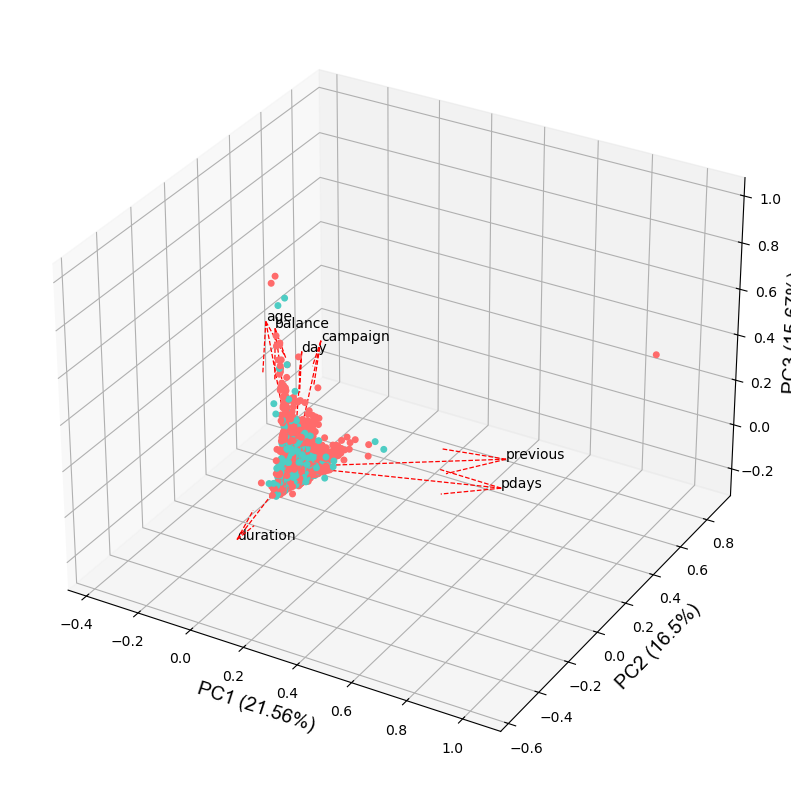

In [27]:
# get 3D biplot
# Usar colores_validos para asignar colores válidos a los puntos
cluster.biplot(
    cscore=pca_scores,
    loadings=cargas.values.T,
    labels=columnas_numericas.columns.values,
    dotsize=16,
    colordot=colores_validos,  # <- usar la lista de colores válidos
    arrowcolor='r',
    arrowlinewidth=0.9,
    arrowlinestyle='--',
    show=True,
    dim=(12,10),
    axlabelfontsize=14,
    var1=round(pca2.explained_variance_ratio_[0]*100, 2),
    var2=round(pca2.explained_variance_ratio_[1]*100, 2),
    var3=round(pca2.explained_variance_ratio_[2]*100, 2)
)

Este gráfico 3D muestra un Análisis de Componentes Principales donde las tres componentes explican aproximadamente 50% de la varianza total (21.56%, 16.5% y 11.67%). Se observa una concentración masiva de puntos cerca del origen con algunos outliers dispersos. Los vectores rojos indican que balance, duration y campaign tienen mayor peso en PC1, mientras que previous y pdays se orientan hacia PC2 y PC3, capturando diferentes dimensiones de variabilidad en los datos.

# K means y DBSCAN comparacion

In [28]:
# El dataframe original se llama df y el dataframe con PCA se llama df_pca2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



df.head(5)
df_pca2.head(5)

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,0.033707,-1.402827,1.025284,-1.075341,-0.778167,0.292582,-0.152987
1,0.017589,-0.954478,-0.356871,-1.208935,-0.259824,0.274863,-0.218753
2,0.022938,-0.699632,-1.071917,-1.197462,0.499407,0.332147,-0.262384
3,0.011669,-0.954774,0.181356,-1.391388,-0.050603,0.248351,-0.206882
4,0.051021,-0.912816,-1.085188,-0.811320,0.363598,0.433987,-0.252515


Columnas seleccionadas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


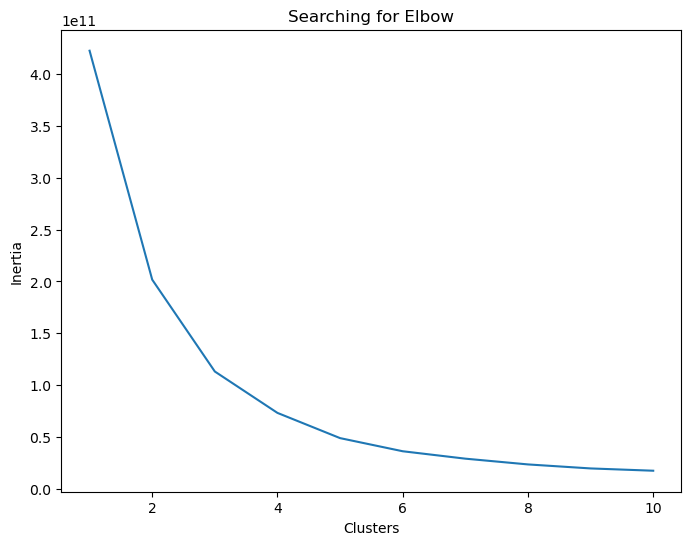

In [32]:
# Aplicar K-means al dataframe original (usar datos estandarizados)
# Seleccionar solo columnas numéricas
X_numeric = df.select_dtypes(include=['int64', 'float64'])

print(f"Columnas seleccionadas: {list(X_numeric.columns)}")
# Mostrará: age, balance, day, duration, campaign, pdays, previous

# Aplicar K-Means
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42).fit(X_numeric)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()


Este grafico muestra el metodo del codo para determinar el numero optimo de clusters en un analisis de K-means. Se observa una drastica caida hasta los puntos 3-4 y a partir de ahi se estabiliza gradualmente lo que podria indicar que el numero optimo de clusters probablemente se encuentra entre 3 y 4.

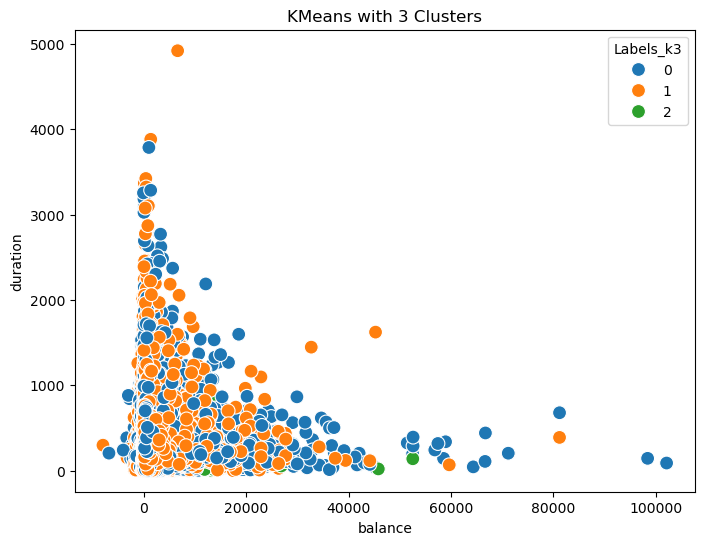

In [33]:
# 3 cluster
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Aplicar KMeans con 3 clusters
km3 = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
X_numeric['Labels_k3'] = km3.labels_

# Visualizar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_numeric, x='balance', y='duration', hue='Labels_k3', palette=sns.color_palette('tab10', 3), s=100)
plt.title('KMeans with 3 Clusters')
plt.show()

Este gráfico muestra un análisis de clustering K-Means con 3 grupos aplicado a datos de balance y duración (posiblemente de cuentas bancarias o similares). Se observa una concentración masiva de puntos en la región inferior izquierda (balance < 20,000 y duración < 1,500), donde los clusters azul (0) y naranja (1) se superponen significativamente, indicando características similares entre estos grupos en rangos bajos. El cluster verde (2) es muy pequeño y aparece casi exclusivamente en la zona de baja duración, sugiriendo un segmento minoritario específico. La distribución muestra varios outliers dispersos, especialmente puntos naranjas con alta duración (>4,000) y algunos puntos azules con balances muy altos (>80,000), lo que evidencia una alta variabilidad en los datos y posiblemente clientes con perfiles financieros extremadamente diferentes al grueso de la población.

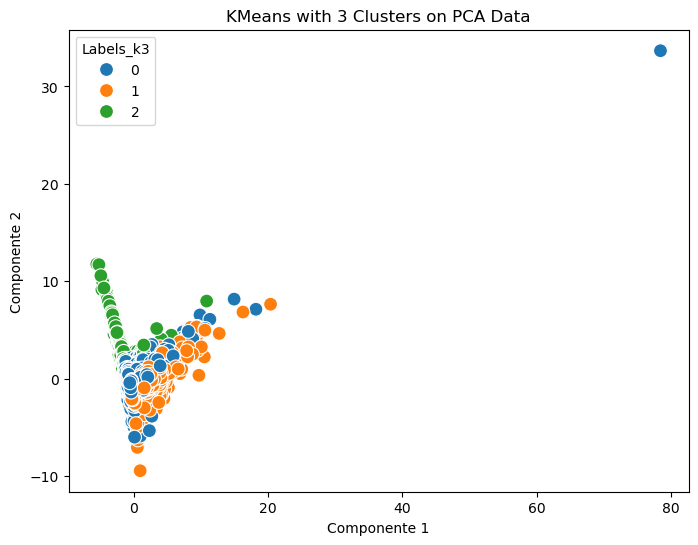

In [34]:
# Aplicar K-means a los datos transformados por PCA
# Escalar los datos PCA
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(df_pca2)
# Aplicar KMeans con 3 clusters
km3_pca = KMeans(n_clusters=3, random_state=42).fit(X_pca_scaled)
df_pca2['Labels_k3'] = km3_pca.labels_
# Visualizar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca2, x='Componente 1', y='Componente 2', hue='Labels_k3', palette=sns.color_palette('tab10', 3), s=100)
plt.title('KMeans with 3 Clusters para datos generados por PCA')
plt.show()

Este grafico muestra el clustering k-means con 3 grupos aplicado sobre los datos despues de PCA. Se observa que la mayoria de los puntos estan concentrado en la region izquierda del grafico, con tres clusters diferenciados por color azul, naranja y verde. El cluster verde forma una agrupacion distintiva en la parte superior izquierda, mientras que los clusters azul y naranja se mezclan parcialmente en la region central-inferior, sugiriendo cierta superposicion entre estos grupos. Destaca un punto azul aislado en la esquina superior derecha, que podria ser un outlier o un punto con caracteristicas muy particulares que lo separan de la poblacion.

K-means en el DataFrame Original:
0    23129
1    20386
2     1696
Name: count, dtype: int64

K-means en el DataFrame con PCA:
1    21963
0    21565
2     1683
Name: count, dtype: int64


Text(0.5, 1.0, 'Comparación de Clusters: DataFrame Original vs PCA')

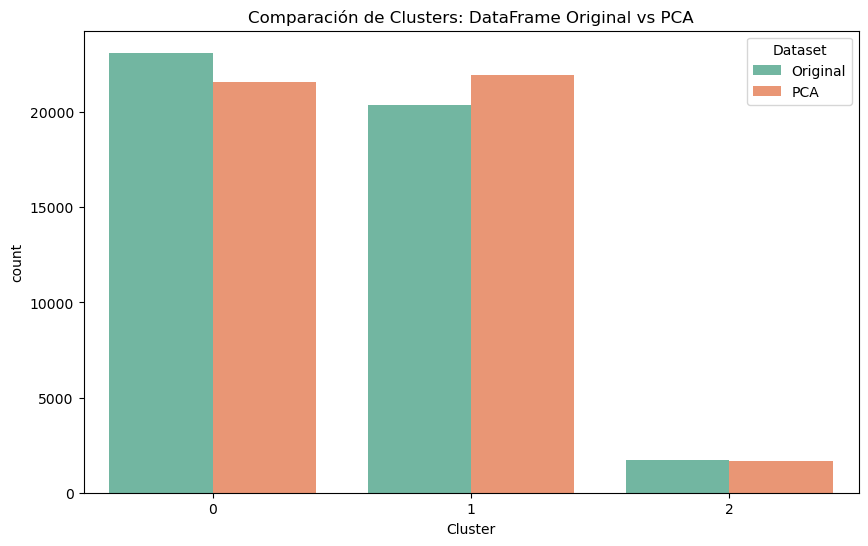

In [36]:
# Analisis comparativo K-means original vs PCA
print("K-means en el DataFrame Original:")
labels_original = X_numeric['Labels_k3'].values
print(pd.Series(labels_original).value_counts())
print("\nK-means en el DataFrame con PCA:")
labels_pca = df_pca2['Labels_k3'].values
print(pd.Series(labels_pca).value_counts())
# Grafico comparativo
labels_comparison = pd.DataFrame({
    'Original': labels_original,
    'PCA': labels_pca
})
plt.figure(figsize=(10, 6))
sns.countplot(data=labels_comparison.melt(var_name='Dataset', value_name='Cluster'), x='Cluster', hue='Dataset', palette='Set2')
plt.title('Comparación de Clusters: DataFrame Original vs PCA')


Este gráfico muestra que tanto el clustering sobre datos originales (verde) como sobre datos con PCA (naranja) producen distribuciones casi idénticas, con dos clusters grandes (23,000 y 20,500 puntos) y uno muy pequeño (1,500-2,000 puntos), lo que valida que PCA preservó bien la estructura de los datos sin distorsionar los patrones de agrupación. El cluster minoritario (Cluster 2) representa aproximadamente el 5% de los datos y podría identificar un segmento especial de clientes con características distintas, mientras que los clusters 0 y 1 concentran la gran mayoría de la población con comportamientos más comunes.

In [ ]:
# !jupyter nbconvert --to html "Tarea5.ipynb"

[NbConvertApp] Converting notebook Tarea5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 1237863 bytes to Tarea5.html
